<a href="https://colab.research.google.com/github/krdeepak39/Submission/blob/main/EV_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
import tensorflow as tf
import os


In [3]:
path= 'drive/MyDrive/Colab Notebooks/submission.csv'

In [4]:
data= pd.read_csv(path)

In [5]:
data.head(10)

,Company,Last Trade,Changes,Volume,Share Outstanding,Market Cap
0,GREENPOWER MOTOR,2.26,0.00,0,24990000,56480000
1,TESLA,199.95,0.00,0,3180000000,635840000000
2,TOYOTA MOTOR,227.36,0.00,0,1350000000,306940000000
3,FORD,12.30,0.00,0,3900000000,47970000000
4,GENERAL MOTORS,38.70,0.00,0,1150000000,44500000000
5,LI AUTO,31.64,0.00,0,1000000000,31640000000
6,BYD COMPANY,23.55,-0.15,89579,1100000000,25900000000
7,RIVIAN AUTOMOTIVE,16.30,0.00,0,949890000,15480000000
8,VINFAST AUTO,5.46,0.00,0,2340000000,12780000000
9,NIO,6.14,0.00,0,2080000000,12770000000


In [6]:
data.shape

(46, 6)

In [7]:
data.isna().sum()

Company               0
 Last Trade           0
 Changes              0
 Volume               0
 Share Outstanding    0
 Market Cap           0
dtype: int64

In [8]:
data.drop('Company', axis=1, inplace=True)

In [9]:
data.head()

,Last Trade,Changes,Volume,Share Outstanding,Market Cap
0,2.26,0.0,0,24990000,56480000
1,199.95,0.0,0,3180000000,635840000000
2,227.36,0.0,0,1350000000,306940000000
3,12.30,0.0,0,3900000000,47970000000
4,38.70,0.0,0,1150000000,44500000000


In [10]:
data=data.values

In [11]:
train_data =data[:,1:]
train_label = data[:,0]

In [12]:


split=0.2
train_X = train_data[:int((1-split)*data.shape[0]),:]
test_X = train_data[int((1-split)*data.shape[0]):,:]
train_Y = train_label[:int((1-split)*data.shape[0])]
test_Y = train_label[int((1-split)*data.shape[0]):]

In [13]:
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)

(36, 4) (36,) (10, 4) (10,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
min_max_scaler = MinMaxScaler()

In [16]:
train_X= min_max_scaler.fit_transform(train_X)
test_X= min_max_scaler.fit_transform(test_X)

In [17]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential(name = 'EV_sales')
model.add(Dense(10, input_dim = train_X.shape[1], activation = 'linear', name = "Input_layer"))
model.add(Dense(5, activation = 'linear', name = "layer_1"))
model.add(Dense(2, activation = 'linear', name = "layer_2"))
model.add(Dense(1, activation = 'linear', name = "layer_3"))

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

In [20]:
model.summary()

Model: "EV_sales"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                50        
                                                                 
 layer_1 (Dense)             (None, 5)                 55        
                                                                 
 layer_2 (Dense)             (None, 2)                 12        
                                                                 
 layer_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(train_X, train_Y, batch_size=5, epochs=1000, validation_data=(test_X, test_Y))

Epoch 1/1000
8/8 [==============================] - 1s 54ms/step - loss: 2721.0498 - root_mean_squared_error: 52.1637 - val_loss: 0.7770 - val_root_mean_squared_error: 0.8815
Epoch 2/1000
8/8 [==============================] - 0s 13ms/step - loss: 2708.0244 - root_mean_squared_error: 52.0387 - val_loss: 0.5919 - val_root_mean_squared_error: 0.7694
Epoch 3/1000
8/8 [==============================] - 0s 11ms/step - loss: 2697.6248 - root_mean_squared_error: 51.9387 - val_loss: 0.4886 - val_root_mean_squared_error: 0.6990
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 2688.1655 - root_mean_squared_error: 51.8475 - val_loss: 0.4320 - val_root_mean_squared_error: 0.6573
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 2681.9136 - root_mean_squared_error: 51.7872 - val_loss: 0.3878 - val_root_mean_squared_error: 0.6227
Epoch 6/1000
8/8 [==============================] - 0s 12ms/step - loss: 2673.9431 - root_mean_squared_error: 51.7102 - val_l

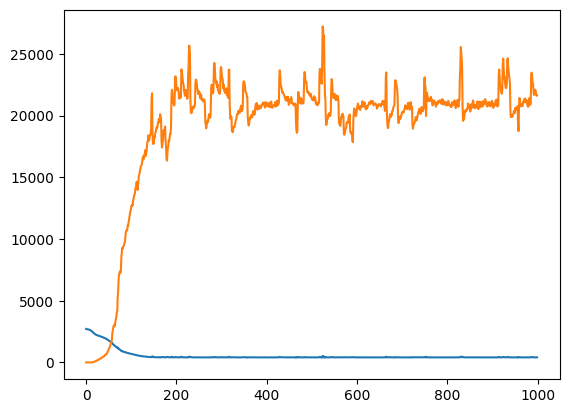

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [23]:
model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 174ms/step - loss: 21633.9258 - root_mean_squared_error: 147.0848


[21633.92578125, 147.0847625732422]

In [24]:
preds = model.predict(test_X)

1/1 [==============================] - 0s 148ms/step


In [25]:
for i in range(preds.shape[0]):
  print(preds[i], test_Y[i])

[252.04027] 0.29
[188.77951] 0.13
[173.20181] 0.09
[165.79803] 1.63
[138.97293] 0.49
[138.0673] 1.81
[126.03221] 0.22
[81.18861] 0.62
[15.500446] 1.21
[-13.624502] 0.005
